In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Base data investigation & cleaning

In [2]:
train = pd.read_csv("train.csv")

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
num_cols = train._get_numeric_data().columns

<AxesSubplot:>

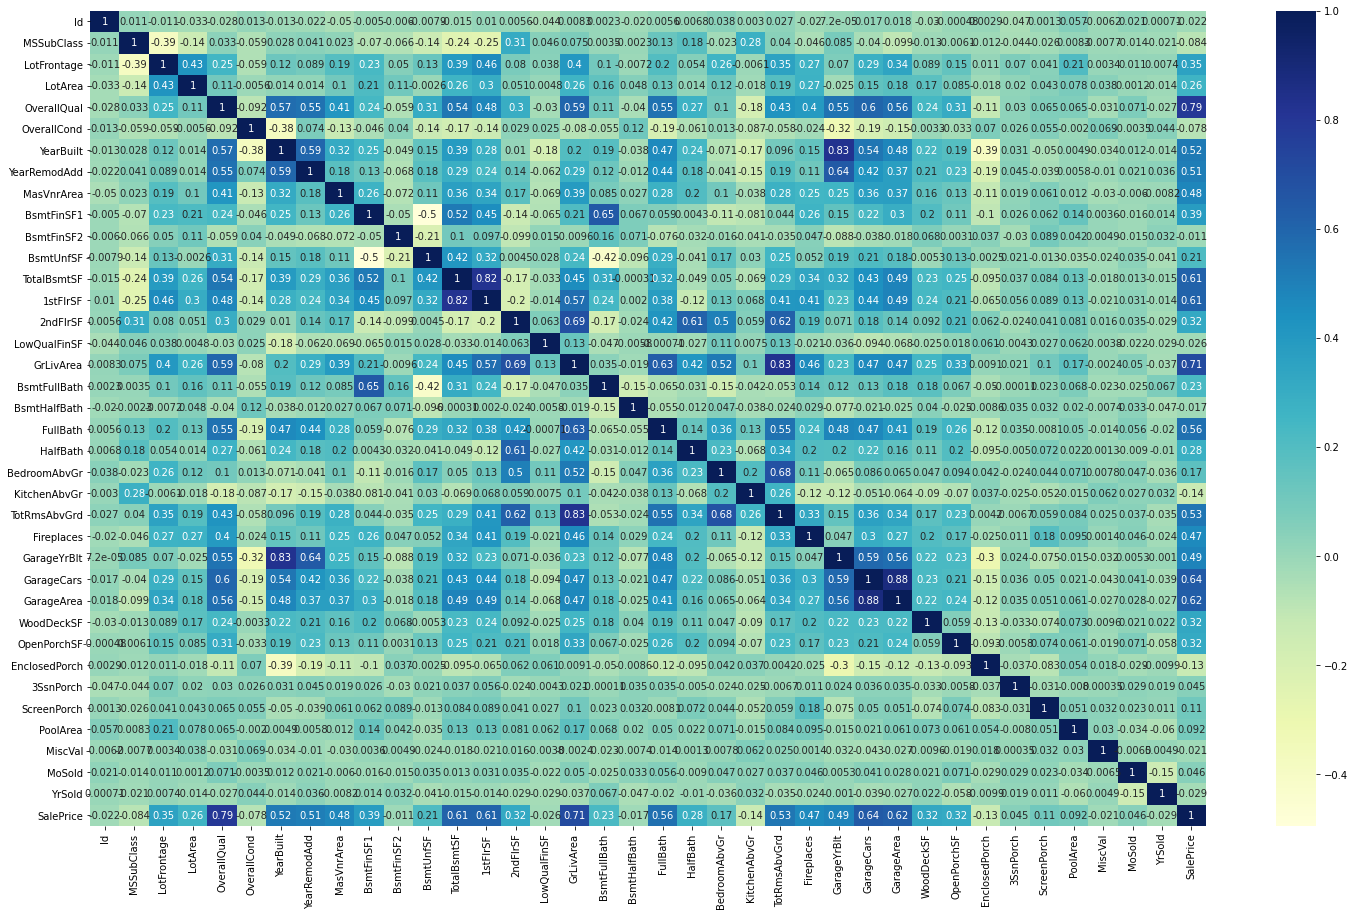

In [4]:
mat = train.corr()
plt.figure(figsize=(25,15))
sns.heatmap(mat, annot=True, cmap="YlGnBu")

to delete: MiscVal, MoSold, 3SsnPorch, EnclosedPorch, KitchenAbvGr, BsmtHalfBath, LowQualFinSF, BsmtFinSF2, OverallCond, MSSubClass, YrSold

In [5]:
T = train[num_cols].drop(columns = ["MiscVal", "MoSold", "3SsnPorch", 
                      "EnclosedPorch", "KitchenAbvGr", "BsmtHalfBath", 
                      "LowQualFinSF", "BsmtFinSF2", "OverallCond", 
                      "MSSubClass", "YrSold", "ScreenPorch",
                                   "Id"])

<AxesSubplot:>

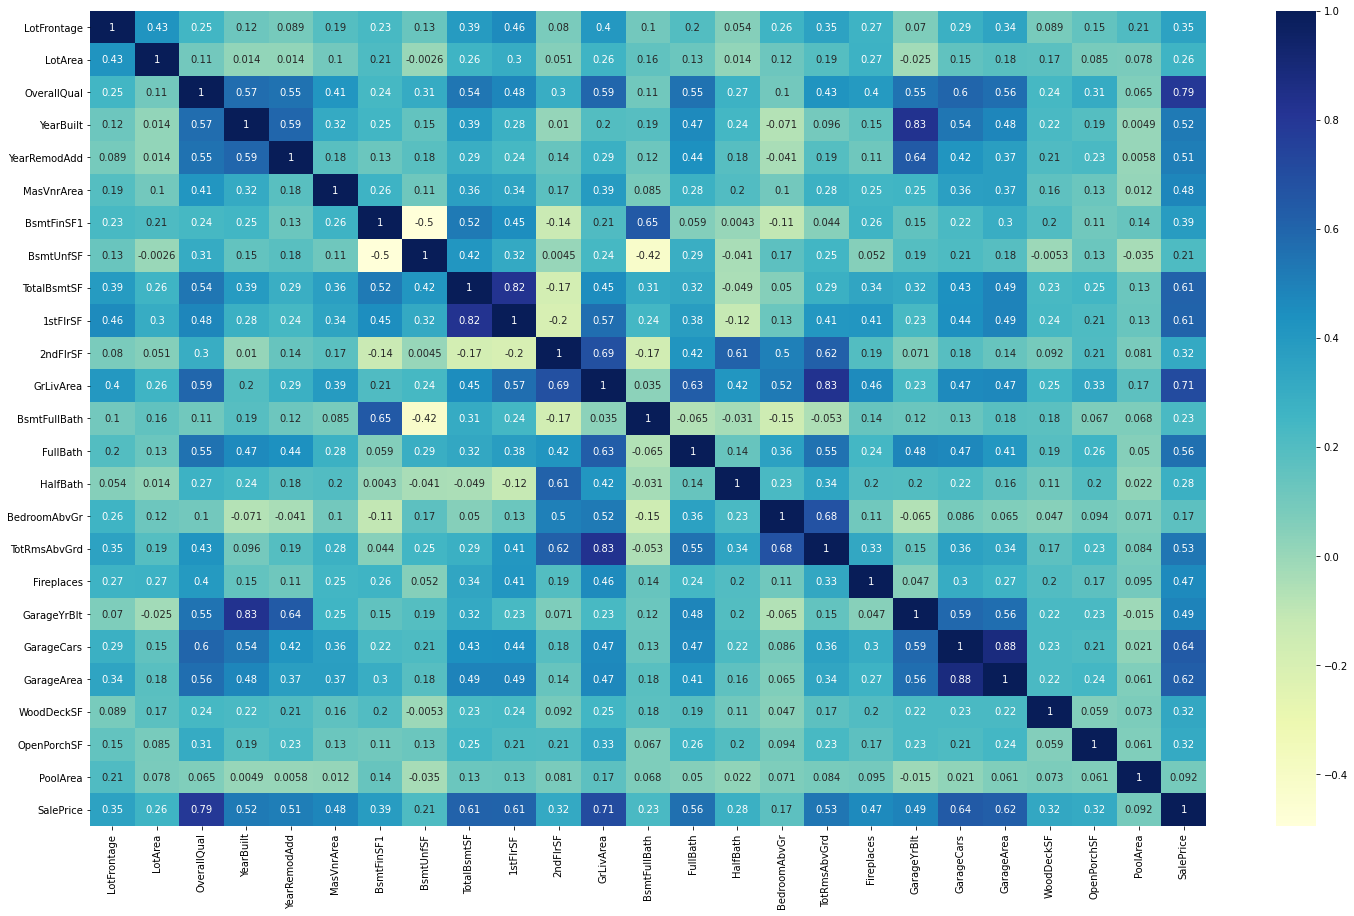

In [6]:
plt.figure(figsize=(25,15))
sns.heatmap(T.corr(), annot=True, cmap="YlGnBu")

In [7]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "simple_white"

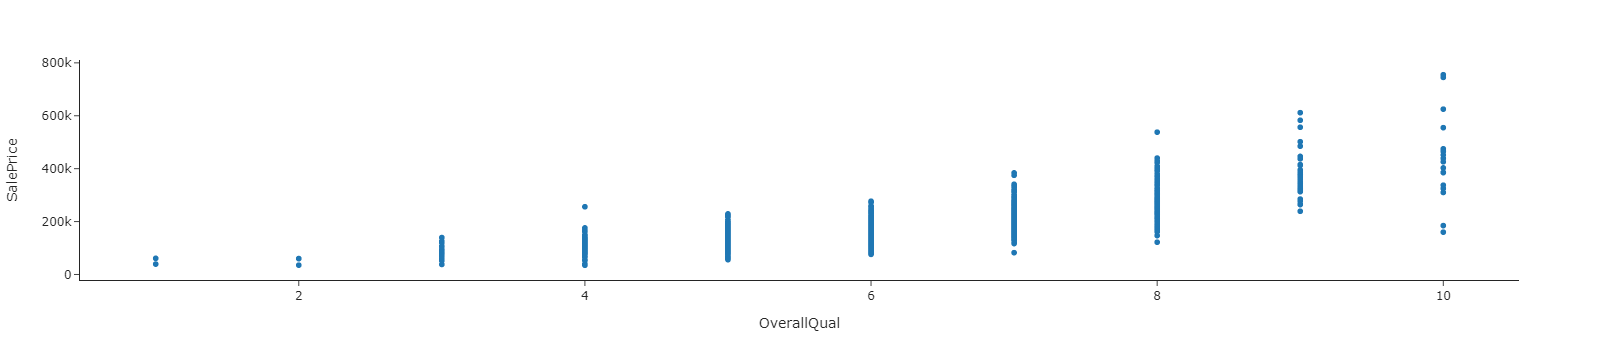

In [8]:
(
    px.scatter(T, x='OverallQual' , y='SalePrice')
   .show()
)

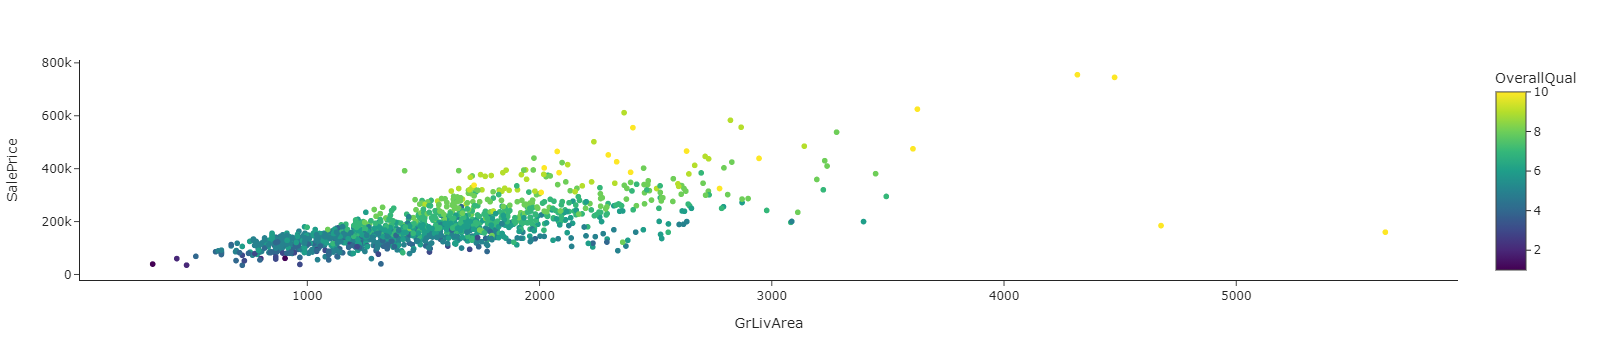

In [9]:
(
    px.scatter(T, x='GrLivArea' , y='SalePrice', color="OverallQual")
   .show()
)

In [10]:
T.drop(T[(T.GrLivArea > 4000) & (T.OverallQual == 10) & (T.SalePrice < 400000)].index, inplace=True)

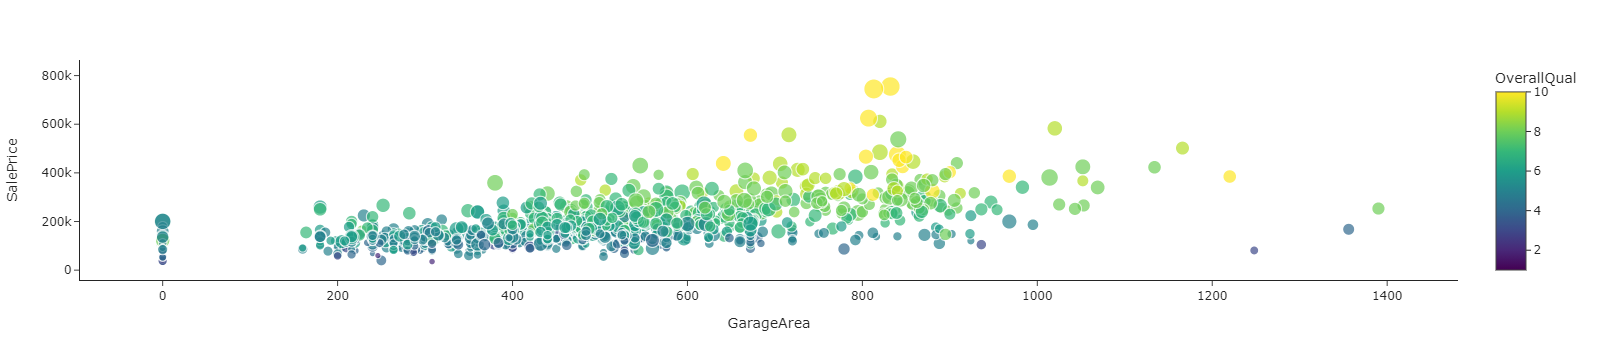

In [11]:
(
    px.scatter(T, x='GarageArea' , y='SalePrice', color="OverallQual", size="GrLivArea")
   .show()
)

In [12]:
T.drop(T[(T.GarageArea > 1200) & (T.SalePrice < 100000)].index, inplace=True)

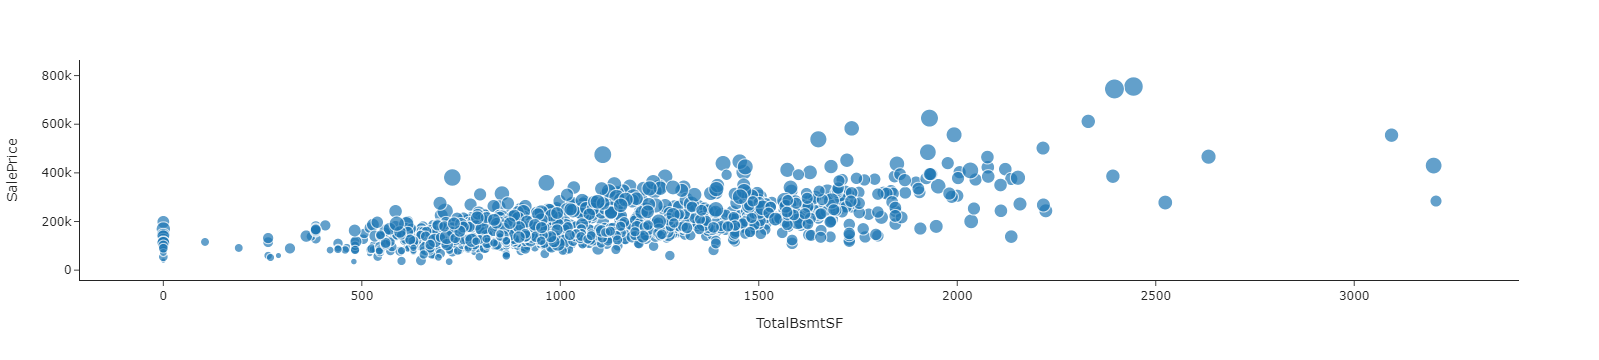

In [13]:
(
    px.scatter(T, x='TotalBsmtSF' , y='SalePrice', size="GrLivArea")
   .show()
)

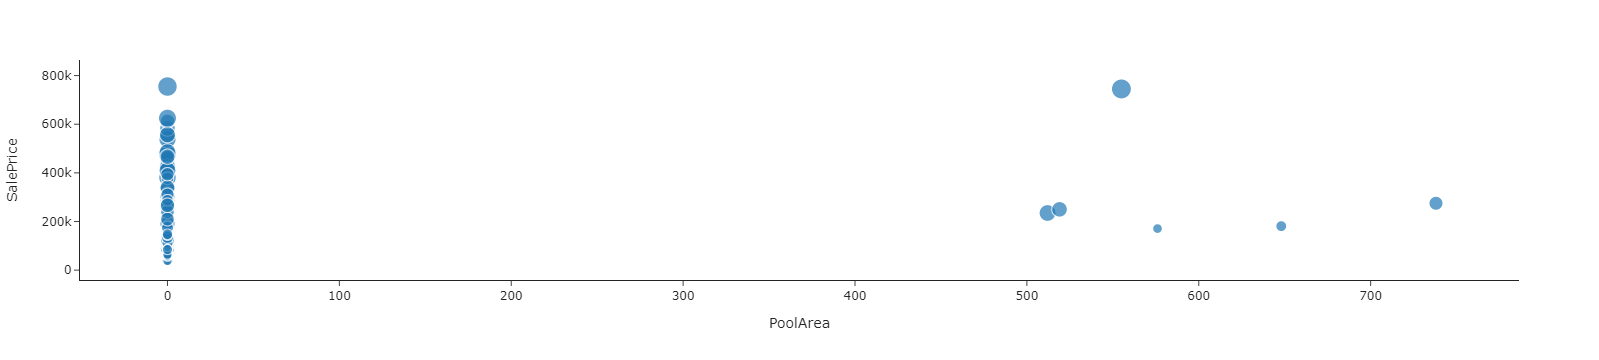

In [14]:
(
    px.scatter(T, x='PoolArea' , y='SalePrice', size="GrLivArea")
   .show()
)

In [15]:
T.PoolArea.quantile([0.95, 0.99])

0.95    0.0
0.99    0.0
Name: PoolArea, dtype: float64

In [16]:
T.drop(columns="PoolArea", inplace=True)

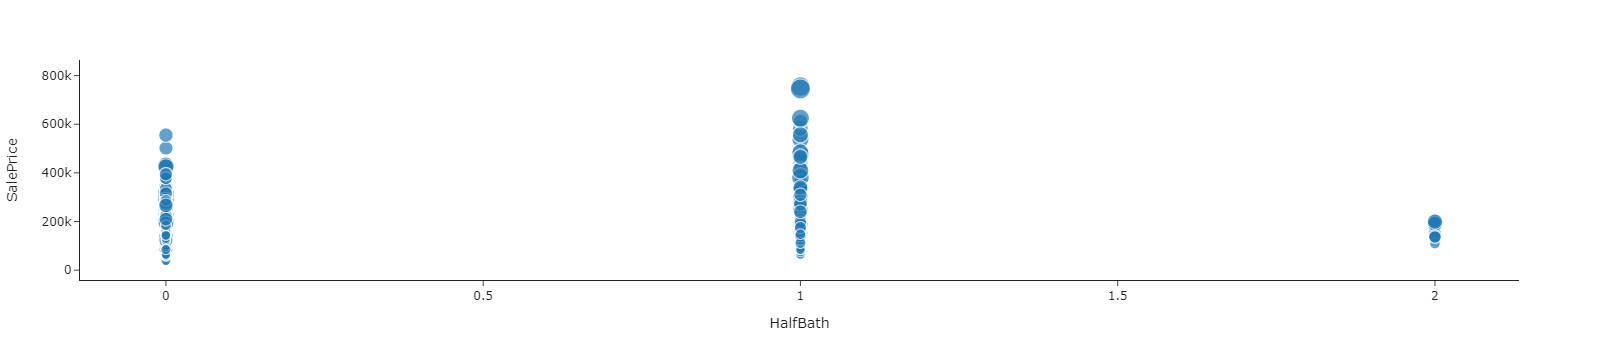

In [17]:
(
    px.scatter(T, x='HalfBath' , y='SalePrice', size="GrLivArea")
   .show()
)

In [18]:
import missingno as msno

<AxesSubplot:>

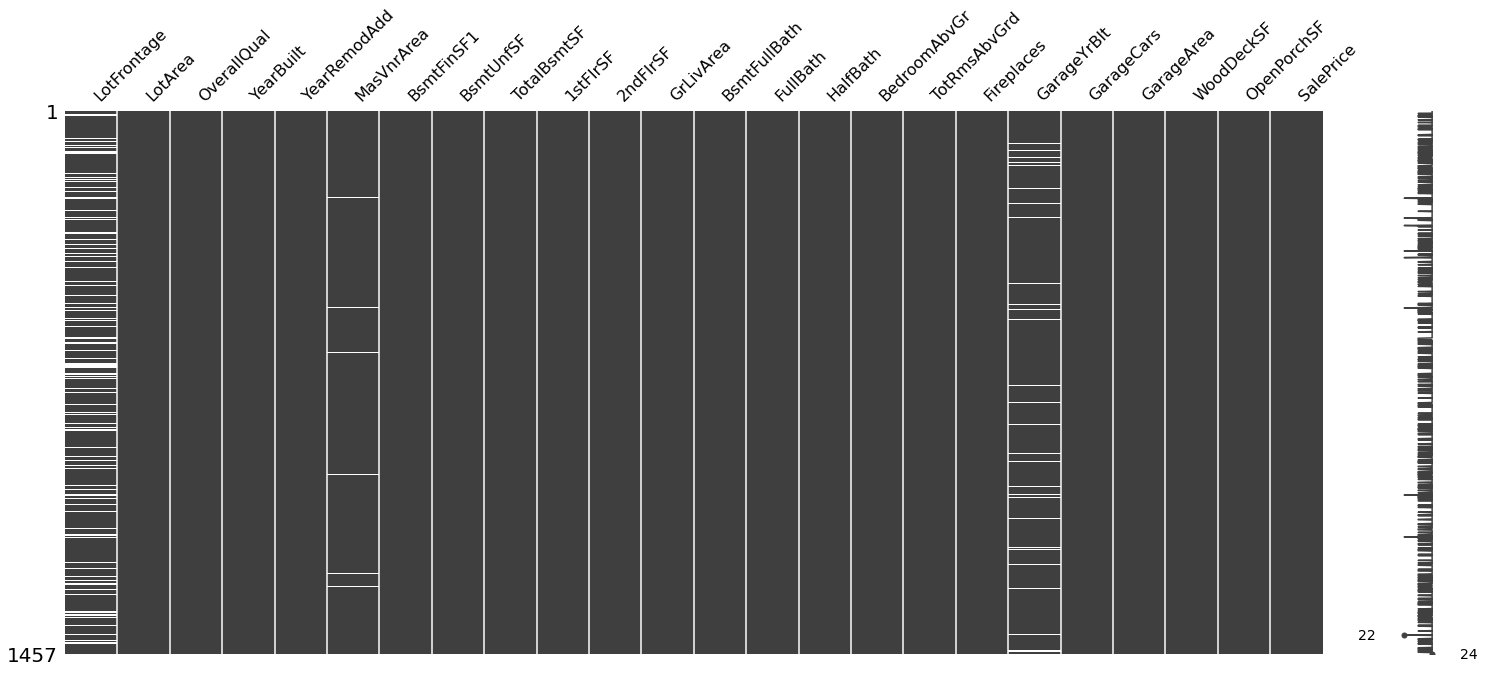

In [19]:
msno.matrix(T)

In [20]:
import copy

<AxesSubplot:>

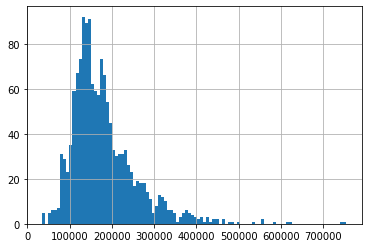

In [62]:
T.SalePrice.hist(bins=100)

In [21]:
y = copy.deepcopy(T.SalePrice)
X = T.drop(columns="SalePrice")

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1198 non-null   float64
 1   LotArea       1457 non-null   int64  
 2   OverallQual   1457 non-null   int64  
 3   YearBuilt     1457 non-null   int64  
 4   YearRemodAdd  1457 non-null   int64  
 5   MasVnrArea    1449 non-null   float64
 6   BsmtFinSF1    1457 non-null   int64  
 7   BsmtUnfSF     1457 non-null   int64  
 8   TotalBsmtSF   1457 non-null   int64  
 9   1stFlrSF      1457 non-null   int64  
 10  2ndFlrSF      1457 non-null   int64  
 11  GrLivArea     1457 non-null   int64  
 12  BsmtFullBath  1457 non-null   int64  
 13  FullBath      1457 non-null   int64  
 14  HalfBath      1457 non-null   int64  
 15  BedroomAbvGr  1457 non-null   int64  
 16  TotRmsAbvGrd  1457 non-null   int64  
 17  Fireplaces    1457 non-null   int64  
 18  GarageYrBlt   1376 non-null 

`LotFrontage`: Linear feet of street connected to property

`MasVnrArea`: Masonry veneer area in square feet

In [23]:
X.LotFrontage.isna().sum()

259

In [24]:
X.LotFrontage.fillna(0, inplace=True)w

In [25]:
X.LotFrontage.isna().sum()

0

In [26]:
X.MasVnrArea.isna().sum()

8

In [27]:
X.MasVnrArea.fillna(0, inplace=True)

In [28]:
X.GarageYrBlt.describe()

count    1376.000000
mean     1978.452762
std        24.688296
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [29]:
X.GarageYrBlt.median()p

1980.0

In [30]:
X.GarageYrBlt.fillna(1980, inplace=True)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1457 non-null   float64
 1   LotArea       1457 non-null   int64  
 2   OverallQual   1457 non-null   int64  
 3   YearBuilt     1457 non-null   int64  
 4   YearRemodAdd  1457 non-null   int64  
 5   MasVnrArea    1457 non-null   float64
 6   BsmtFinSF1    1457 non-null   int64  
 7   BsmtUnfSF     1457 non-null   int64  
 8   TotalBsmtSF   1457 non-null   int64  
 9   1stFlrSF      1457 non-null   int64  
 10  2ndFlrSF      1457 non-null   int64  
 11  GrLivArea     1457 non-null   int64  
 12  BsmtFullBath  1457 non-null   int64  
 13  FullBath      1457 non-null   int64  
 14  HalfBath      1457 non-null   int64  
 15  BedroomAbvGr  1457 non-null   int64  
 16  TotRmsAbvGrd  1457 non-null   int64  
 17  Fireplaces    1457 non-null   int64  
 18  GarageYrBlt   1457 non-null 

## Models

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model, tree

In [33]:
X

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  FullBath  HalfBath  \
0            706        150          856       856  ...         2         1   
1            978        284         1262      1262  ...         2         0   
2            486        434          920       920  ...         2         1   
3            216        540          756       961  ...         1         0   
4            655        490         1145      1145  ...         2         1   
...          ...        ...          ...       ...  ...       ...       ...   
1455           0        953          953       953  ...         2         1   
1456         790        589         1542      2073  ...         2         0   
1457         275        877         1152      1188  ...         2         0   
1458          49          0         1078      1078  ...         1         0   
1459         830        136         1256      1256  ...         1         1   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0                3             8           0       2003.0           2   
1                3             6           1       1976.0           2   
2                3             6           1       2001.0           2   
3                3             7           1       1998.0           3   
4                4             9           1       2000.0           3   
...            ...           ...         ...          ...         ...   
1455             3             7           1       1999.0           2   
1456             3             7           2       1978.0           2   
1457             4             9           2       1941.0           1   
1458             2             5           0       1950.0           1   
1459             3             6           0       1965.0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  
0            548           0           61  
1            460         298            0  
2            608           0           42  
3            642           0           35  
4            836         192           84  
...          ...         ...          ...  
1455         460           0           40  
1456         500         349            0  
1457         252           0           60  
1458         240         366            0  
1459         276         736           68  

[1457 rows x 23 columns]

In [34]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1457, dtype: int64

## Cross-validation

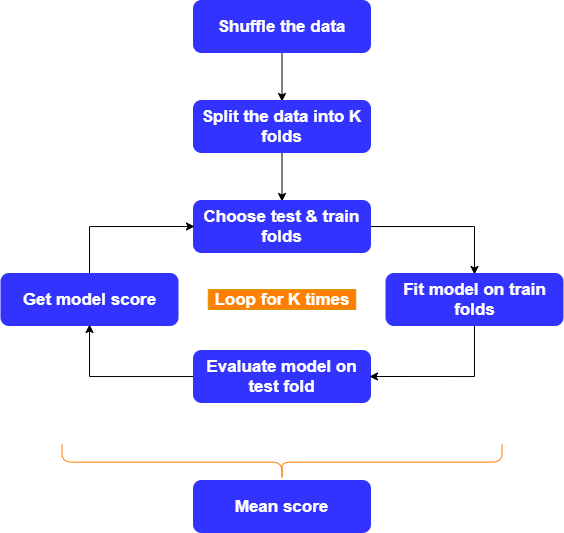

### K Fold Cross Validation

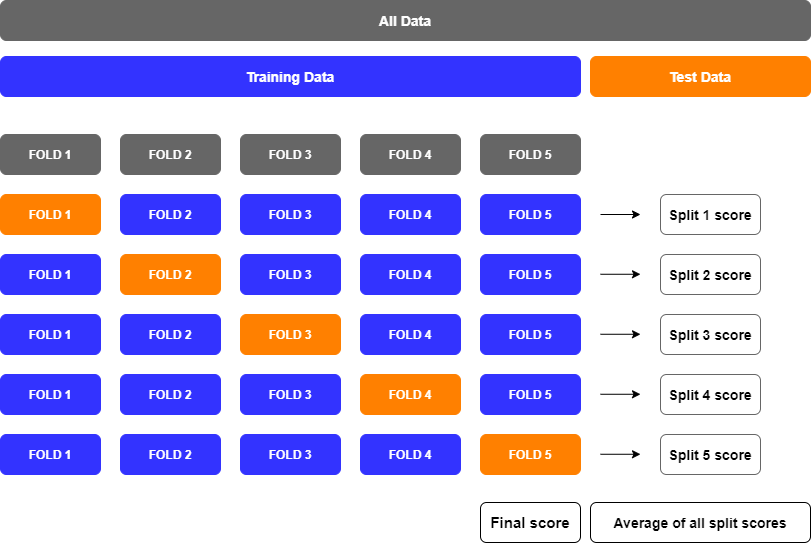

## Linear models

#### Simple Linear Regression.

Модель: $ a(x)=\sum_{j=1}^{d+1} w_{j} x^{j}=\langle w, x\rangle $

Обучение модели: $ Q(w, x)=\frac{1}{\ell} \sum_{i=1}^{\ell}\left(\left\langle w, x_{i}\right\rangle-y_{i}\right)^{2} \rightarrow \min _{w} $

In [35]:
def rmse(score):
    return np.sqrt(-score)

In [36]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score_lin_reg = cross_val_score(linear_model.LinearRegression(), X, y, cv=kf, scoring="neg_mean_squared_error")

In [37]:
rmse(score_lin_reg.mean())

31128.035198729624

#### Ridge regression ($L_2$ regularization)

Solving overfiting problem

$\lambda$ — our model's parameter

Обучение модели: $w_{*}=\operatorname{argmin}_{w}\left(\frac{1}{\ell} \sum_{i=1}^{\ell}\left(\left\langle w, x_{i}\right\rangle-y_{i}\right)^{2}+\lambda \sum_{j=1}^{d} w_{j}^{2}\right)$

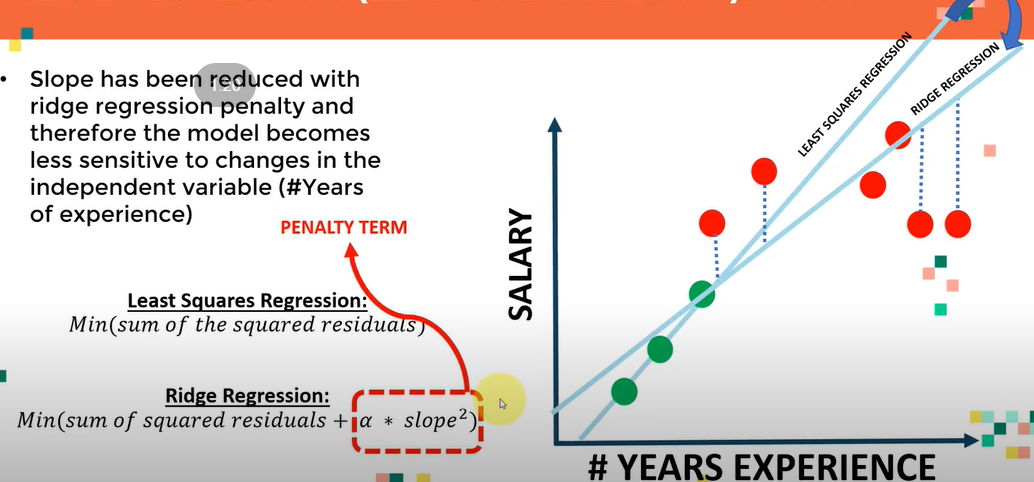

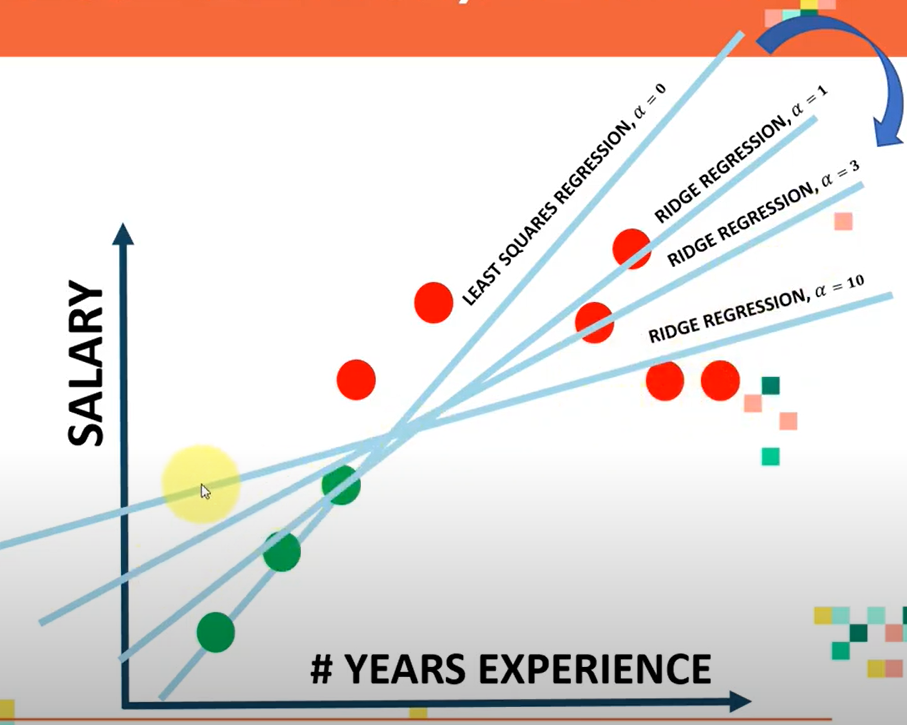

In [38]:
alphas = np.linspace(0, 20, 100)

rmse_ridge_lst = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    
    ridge_score = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")
    score = rmse(ridge_score.mean())
    rmse_ridge_lst.append(score)

In [39]:
min(rmse_ridge_lst)

31104.852611268772

#### Lasso regression ($L_1$ regularization)

Solving overfiting problem

$\lambda$ — our model's parameter

Обучение модели: $w_{*}=\operatorname{argmin}_{w}\left(\frac{1}{\ell} \sum_{i=1}^{\ell}\left(\left\langle w, x_{i}\right\rangle-y_{i}\right)^{2}+\lambda \sum_{j=1}^{d}\left|w_{j}\right|\right)$

In [40]:
lambdas = np.linspace(0.1, 20, 10)

rmse_lasso_lst = []
for lam in lambdas:
    lasso = linear_model.Lasso(alpha=lam, max_iter=10000)
    
    lasso_score = cross_val_score(lasso, X, y, cv=kf, scoring="neg_mean_squared_error")
    score = rmse(lasso_score.mean())
    rmse_lasso_lst.append(score)

In [41]:
min(rmse_lasso_lst)

31122.741134824762

## Decision tree

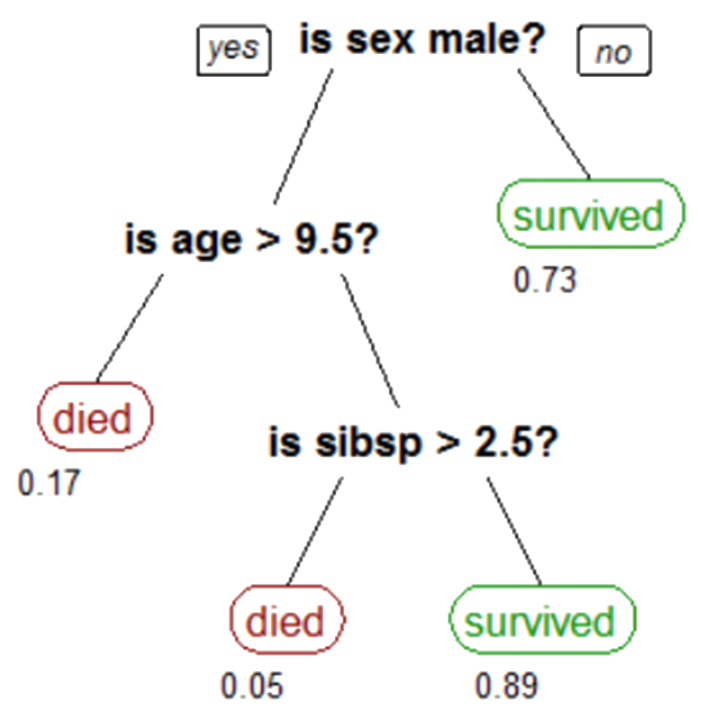

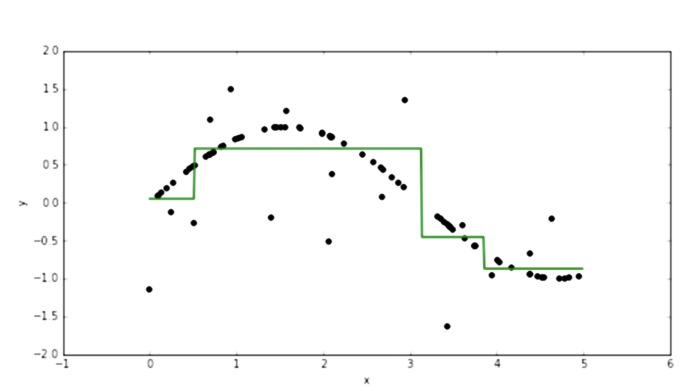

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
for val in range(1, 20):
    score = cross_val_score(DecisionTreeRegressor(max_depth=val, random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    print(rmse(score.mean()))

For max depth: 1
58655.57088766766
For max depth: 2
48798.19903035208
For max depth: 3
42725.152182137645
For max depth: 4
38086.110967729095
For max depth: 5
38634.94614584538
For max depth: 6
36116.64316341003
For max depth: 7
37238.69334540622
For max depth: 8
39214.67347892182
For max depth: 9
39669.925536206945
For max depth: 10
39342.86317034038
For max depth: 11
39947.95385442042
For max depth: 12
39391.373088957225
For max depth: 13
40497.19363160261
For max depth: 14
39803.225312463415
For max depth: 15
41703.22643831749
For max depth: 16
39046.35896022762
For max depth: 17
39054.16325480229
For max depth: 18
39918.23138153512
For max depth: 19
40017.107006194274


## Random forest regressor

1. Композиция - это объединение $N$ алгоритмов $b_{1}(x), \ldots, b_{N}(x)$ в один. Идея заключается в том, чтобы обучить алгоритмы $b_{1}(x), \ldots, b_{N}(x)$, а затем усреднить полученные от них ответы:
$$
a(x)=\frac{1}{N} \sum_{n=1}^{N} b_{n}(x)
$$

2. Если взять сложную выборку и обучить на ней решающее дерево до конца, то есть пока в каждом из лепестков
не останется по одному объекту, получившаяся разделяющая поверхность будет очень сложной. 

3. С сложностью мы будем боротся, собирая новый алгоритм (случайний лес) из набора других алгоритмов (деревьев)

4. Чтобы построить композицию, нужно сначала обучить N базовых алгоритмов, причем их нельзя обучать на
всей обучающей выборке, так как в этом случае они получаются одинаковыми, и в их усреднении не будет
никакого смысла.

5. Для того, чтобы сделать деревья различными, мы вносим в наш процес обучения элемент рандома след. способами
    - **Беггинг**: Обучение базовых алгоритмов происходит на случайных подвыборках обучающей выборки.
      Причем чем меньше размер случайной подвыборки, тем более независимыми получаются базовые алгоритмы.
    -**Метод случайных подпространств**: выбирается случайное подмножество признаков (столбцов матрицы «объекты–признаки») и очередной базовый алгоритм обучается только на этих признаках. Доля
     выбираемых признаков является гиперпараметром этого метода.
    -**Бутстрап** заключается в том, что из обучающей выборки длины $k$ ` выбирают с возвращением ` $k$ объектов. При этом новая выборка также будет иметь размер $k$, но некоторые объекты в ней будут повторятся, а некоторые объекты из исходной выборки в нее не попадут. Можно показать, что в бутстрапированной выборке будет содержаться в среднем 63% различных объектов исходной выборки

In [49]:
from sklearn import ensemble

In [52]:
estimators = [50, 100, 150, 200, 250, 300, 350, 500, 650]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators=count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    print(rmse(score.mean()))

For estimators: 50
26921.127145635128
For estimators: 100
26889.809212396765
For estimators: 150
26928.419752830498
For estimators: 200
26869.965628524147
For estimators: 250
26918.42859630197
For estimators: 300
26957.098699736416
For estimators: 350
26948.438382580167
For estimators: 500
26834.292259897873
For estimators: 650
26825.674090585162


## Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

Пусть дана задача регрессии, в которой в качестве ошибки используется среднеквадратичная ошибка:
$$
M S E(a, X)=\frac{1}{\ell} \sum_{i=1}^{\ell}\left(a\left(x_{i}\right)-y_{i}\right)^{2}
$$
Для начала необходимо обучить первый простой алгоритм (например, неглубокое решающее дерево):
$$
b_{1}(x)=\operatorname{argmin}_{b} \frac{1}{\ell} \sum_{i=1}^{\ell}\left(b\left(x_{i}\right)-y_{i}\right)^{2}
$$
Такая задача минимизации квадратичной ошибки легко решается, например, градиентным спуском. Этот алгоритм будет первым алгоритмом в строящейся композиции.

Второй алгоритм должен быть обучен таким образом, чтобы композиция первого и второго алгоритмов:
$$
b_{1}\left(x_{i}\right)+b_{2}\left(x_{i}\right)
$$
имела наименьшую из возможных ошибку на обучающей выборке:
$$
b_{2}(x)=\operatorname{argmin}_{b} \frac{1}{\ell} \sum_{i=1}^{\ell}\left(b_{1}\left(x_{i}\right)+b\left(x_{i}\right)-y_{i}\right)^{2}=\operatorname{argmin}_{b} \frac{1}{\ell} \sum_{i=1}^{\ell}\left(b\left(x_{i}\right)-\left(y_{i}-b_{1}\left(x_{i}\right)\right)\right)^{2}
$$
Другими словами, алгоритм $b_{2}(x)$ улучшает качество работы алгоритма $b_{1}(x) .$ Продолжая по аналогии на $N$ шаге очередной алгоритм $b_{N}(X)$ будет определяться следующим образом:
$$
b_{N}(x)=\operatorname{argmin}_{b} \frac{1}{\ell} \sum_{i=1}^{\ell}\left(b\left(x_{i}\right)-\left(y_{i}-\sum_{n=1}^{N-1} b_{n}\left(x_{i}\right)\right)\right)^{2}
$$
Процесс продолжается до тех пор, пока ошибка композиции $b_{1}(x)+\ldots+b_{N}(x)$ не будет устраивать.

In [63]:
rmse_grad_boost_lst = []
for estimarots in [50, 100, 300, 500]:
    for crit in ["mse"]:
        grad_boost = GradientBoostingRegressor(random_state=42, criterion=crit, n_estimators=estimarots)
        score = cross_val_score(grad_boost, X, y, cv= kf, scoring="neg_mean_squared_error")
        print(rmse(score.mean()))
        rmse_grad_boost_lst.append(rmse(score.mean()))

25977.710198575805
25389.339156305694
25467.504471027252
25707.2947418587


In [60]:
min(rmse_grad_boost_lst)

24658.427377907905